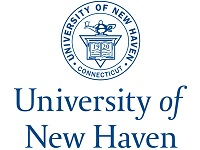
<font size="4"> <center> <br> <br> **REPORT ON:** </center> </font>
## <center> Project 01 - ANOVA Analysis </center>
<font size="4"> <center> **FOR:** </center> </font>
## <center> Introduction to Data Science - 6002 (Section 02) </center>
<center> 
    <font size="3"> <br> <br> <b> Submitted by TEAM 09: </b>
        <br> Jainam Shah
        <br> Singala Sri Sai
        <br> Sapa Bal Narendra
        <br> Sanvelly Vamshi Kanth Reddy
    </font>
    <font size="3"> <br> <br> <br> <b> Under the guidance of: </b>
        <br> Minkyu Kim (Adjunct Faculty) <br>
    </font>
</center>

---

# ABSTRACT

### Background:
> We are given a dataset which has records of people with different levels of education i.e. Less than high school, High School, Jr College, Bachelor's, and Graduate along with the scores regarding their performance. Hence, people in the dataset are categorized into 5 different groups based on their level of education.
### Purpose:
> We want to identify whether the scores of people belonging to different levels of education are same or not. We can also phrase the question as is there any significant relevance of education on a person's score? If we were to pick people randomly from the given dataset for each group, is there a difference among their scores? If yes, is it due to some significant reasons (level of education) or due to randomness? 
### Methods:
> We conducted analysis using ANOVA to compare the means of each group. As the number of groups are more than 2, we cannot use the T-Test or the Z-Test, as it would require n(n-1)/2 number of pariwise tests, increasing type-1 error rate. We first performed Exploratory Data Analysis (EDA) to prepare the dataset for anova and confirmed the intuitive assumptions regarding the data. We then formulated the hypothesis for ANOVA where the null hypothesis was that there is no difference among the means of the groups and the alterante hypothesis was atleast 1 group has different mean.
### Results:
> Based on our analysis, as the p-value was less than significance level and also the F-Statistic was greater than the F-Critical value, we rejected the null hypothesis in favour of the alternate hypothesis.
### Conclusion:
> With significant evidence, we can conclude that there is indeed difference among the means of groups (based on level of education) and that it is not due to randomness. Out of the 5 given groups, we found the following 2 pairs of groups to have different means: 1) "Less than high school" - "Graduate" and 2) "Less than high school" - "Bachelor's". Hence, we can say that people who have completed their Graduation or Bachelor's have different score than those who did not pass high school.

---
# THEORY

### What is ANOVA?
> ANOVA (Analysis of Variance) is a statistical analysis technique that divides systematic components from random factors to account for the observed aggregate variability within a data set. The presented data set is statistically affected by the systematic factors but not by the random ones. The ANOVA test is used by analyst to evaluate the impact of independent factors on the dependent variables in a regression analysis. ANOVA is also called as Fisher Analysis of variance and it is the extension of the t-test and z-test.
### Types of ANOVA:
> 1. One-way ANOVA <br >
> 2. Two-way ANOVA <br >
> 3. N-way ANOVA
### ANOVA Assumptions:
> 1. Normally distributed population derives different group samples. <br>
> 2. The sample or distribution has a homogenous variance <br>
> 3. Analyst draw all the data in a sample independently.
### ANOVA Formula: 
> ANOVA coefficient (F) = Mean sum of squares between the groups / Mean squares of Errors. <br> <br>
> $ F = \frac{MSG}{MSE} $
### INTERPRETATIONS:
> The following is how the analyst can interpret the outcomes of the ANOVA test. The P-value is the ANOVA test’s most significant value. ANOVA test uses null hypothesis and alternative hypothesis. According to null hypothesis H0, all group means are equal and alternative hypothesis indicates that all the group means are not equal. When the p-value is less than 0.05 (or the specified significance level) analyst will reject the null hypothesis. Null hypothesis is accepted when the p-value is greater than 0.05 (or the specified significance level). Group means are not equal when analyst reject the null hypothesis


---

# EXPLORATORY DATA ANALYSIS

In [1]:
### Import required libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sqlite3 import connect
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Required constants
DB_PATH = "dataset/dataset.db"
TABLE_NAME = "prj1"

#### Read the database from .db file

In [2]:
### Connect to sqlite3 database
connection = connect(DB_PATH)

### Create pandas dataframe for analysis
query = "SELECT * FROM " + TABLE_NAME
df = pd.read_sql(query, connection)
df

,index,Less than HS,45
0,0,Less than HS,26.0
1,1,Less than HS,43.8
2,2,Less than HS,34.4
3,3,Less than HS,76.2
4,4,Less than HS,0.2
...,...,...,...
1166,1166,Graduate,52.7
1167,1167,Graduate,59.8
1168,1168,Graduate,54.1
1169,1169,Graduate,39.9


#### Metadata - Information regarding the columns of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1171 non-null   int64  
 1   Less than HS  1171 non-null   object 
 2   45            1160 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.6+ KB


#### Modify column names / types

In [4]:
df.rename(columns = {"Less than HS": "Education Level", "45": "Score"}, inplace = True)
df.drop(columns = ["index"], inplace = True)
df.head()

,Education Level,Score
0,Less than HS,26.0
1,Less than HS,43.8
2,Less than HS,34.4
3,Less than HS,76.2
4,Less than HS,0.2


#### Basic stats about each numerical feature

In [5]:
df.describe()

,Score
count,1160.000000
mean,40.726724
std,15.166281
min,0.200000
25%,30.300000
50%,41.000000
75%,51.325000
max,86.400000


#### Unique values for the categorical featue

In [8]:
print("Following are the unique values corresponding to the feature 'Education Level' :")
for idx, edu_lvl in enumerate(df['Education Level'].unique()):
    print(str(idx + 1) + " " + edu_lvl)

Following are the unique values corresponding to the feature 'Education Level' :
1 Less than HS
2 HS
3 Jr Coll
4 Bachelor's
5 Graduate


#### Visualize unique values count

Text(0, 0.5, 'Count')

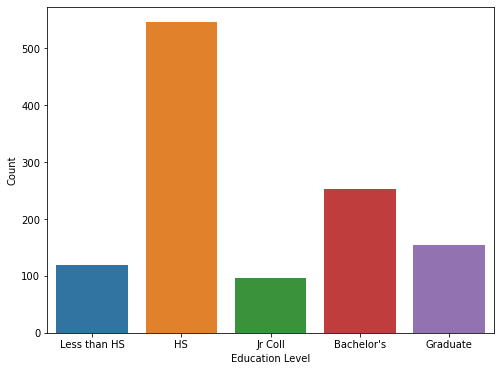

In [9]:
fig, ax = plt.subplots(figsize= (8, 6))

sns.countplot(df['Education Level'], ax = ax)
ax.set_ylabel("Count")

#### Handle null / missing values

In [10]:
### Null values for each category
print("Following are the null values corresponding to each value of 'Education Level' :")
for idx, edu_lvl in enumerate(df['Education Level'].unique()):
    print(str(idx + 1) + " " + edu_lvl + " " + str(df[df['Education Level'] == edu_lvl].isna().sum()[1]))

print("Total Null Values: ", df.isna().sum()[1])    

Following are the null values corresponding to each value of 'Education Level' :
1 Less than HS 2
2 HS 5
3 Jr Coll 1
4 Bachelor's 1
5 Graduate 2
Total Null Values:  11


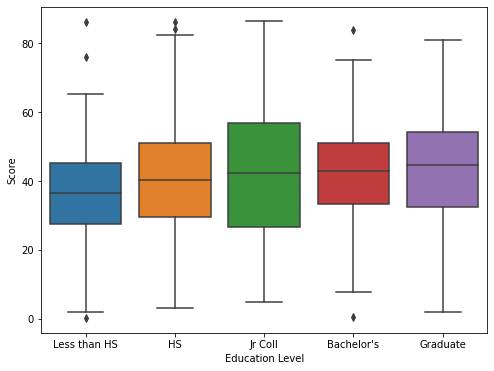

In [11]:
### Visualize each value's distribution
temp_frames = []
fig, ax = plt.subplots(figsize= (8, 6))

for idx, edu_lvl in enumerate(df['Education Level'].unique()):
    temp_frames.append(df[df['Education Level'] == edu_lvl].drop(columns = \
                                ['Education Level']).rename(columns = {"Score": edu_lvl}))

temp_df = pd.concat(temp_frames).reset_index(drop = True)
axis = sns.boxplot(x = "variable", y = "value", data = pd.melt(temp_df), ax = ax)
axis.set(xlabel = 'Education Level', ylabel = 'Score')
plt.show()

In [12]:
### Basic stats for each category in Education Level
temp_df.describe()

,Less than HS,HS,Jr Coll,Bachelor's,Graduate
count,118.000000,541.000000,96.000000,252.000000,153.000000
mean,36.528814,40.123105,41.004167,42.130556,43.612418
std,15.668517,14.886300,18.925799,13.480890,15.066123
min,0.200000,3.100000,4.700000,0.500000,1.800000
25%,27.600000,29.600000,26.525000,33.350000,32.600000
50%,36.400000,40.400000,42.450000,43.050000,44.800000
75%,45.300000,51.000000,57.025000,51.200000,54.200000
max,86.100000,86.300000,86.400000,83.900000,81.000000


In [13]:
### Mean value might not be an accurate measure for missing values due to outliers, so we are using median value
for frame in temp_frames:
    frame.fillna(frame.median(), inplace = True)

temp_df = pd.concat(temp_frames).reset_index(drop = True)
df = pd.melt(temp_df).dropna().reset_index(drop = True).rename(columns = \
                                                {"variable": "Education Level", "value": "Score"})
df

,Education Level,Score
0,Less than HS,26.0
1,Less than HS,43.8
2,Less than HS,34.4
3,Less than HS,76.2
4,Less than HS,0.2
...,...,...
1166,Graduate,52.7
1167,Graduate,59.8
1168,Graduate,54.1
1169,Graduate,39.9


#### Visualize histogram of each category

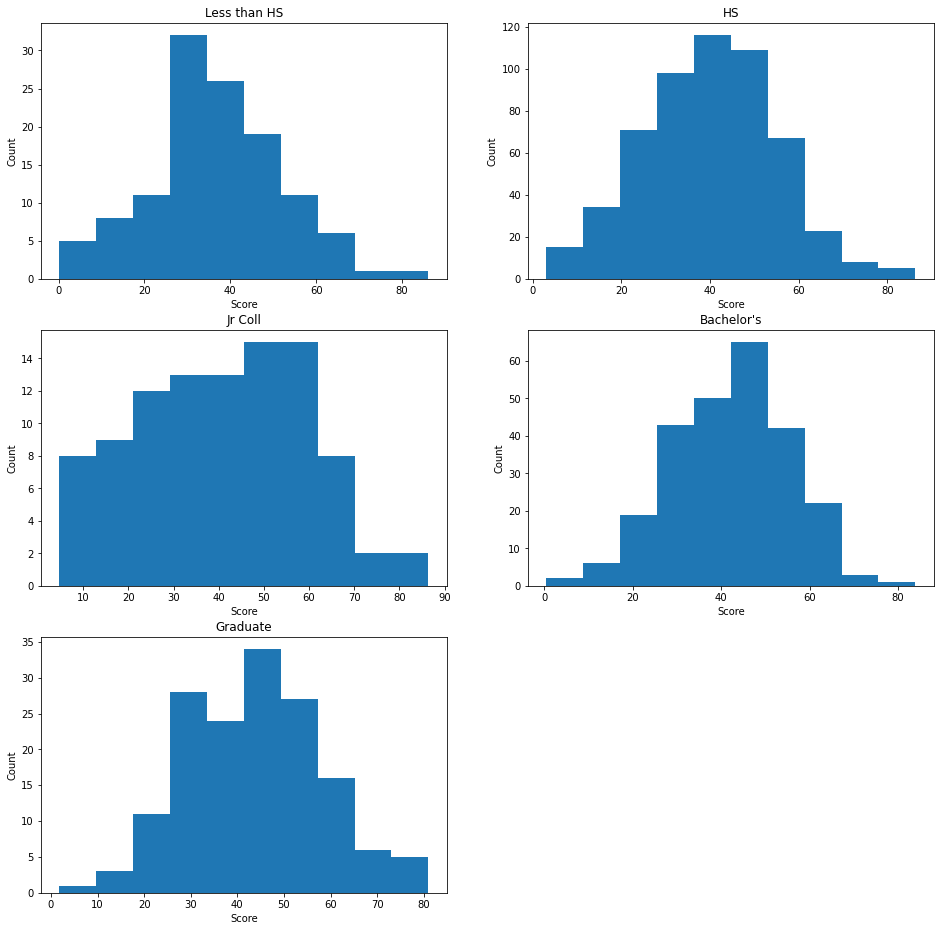

In [14]:
### Matplot lib subplots
figure, axes = plt.subplots(3, 2, figsize=(16, 16))

# Less than HS
axes[0][0].hist(temp_frames[0])
axes[0][0].set_xlabel("Score")
axes[0][0].set_ylabel("Count")
axes[0][0].set_title("Less than HS")

# HS
axes[0][1].hist(temp_frames[1])
axes[0][1].set_xlabel("Score")
axes[0][1].set_ylabel("Count")
axes[0][1].set_title("HS")

# Jr Coll
axes[1][0].hist(temp_frames[2])
axes[1][0].set_xlabel("Score")
axes[1][0].set_ylabel("Count")
axes[1][0].set_title("Jr Coll")

# Bachelor's
axes[1][1].hist(temp_frames[3])
axes[1][1].set_xlabel("Score")
axes[1][1].set_ylabel("Count")
axes[1][1].set_title("Bachelor's")

# Graduate
axes[2][0].hist(temp_frames[4])
axes[2][0].set_xlabel("Score")
axes[2][0].set_ylabel("Count")
axes[2][0].set_title("Graduate")

figure.delaxes(axes[2][1])
plt.show()

#### Density of each category using kde

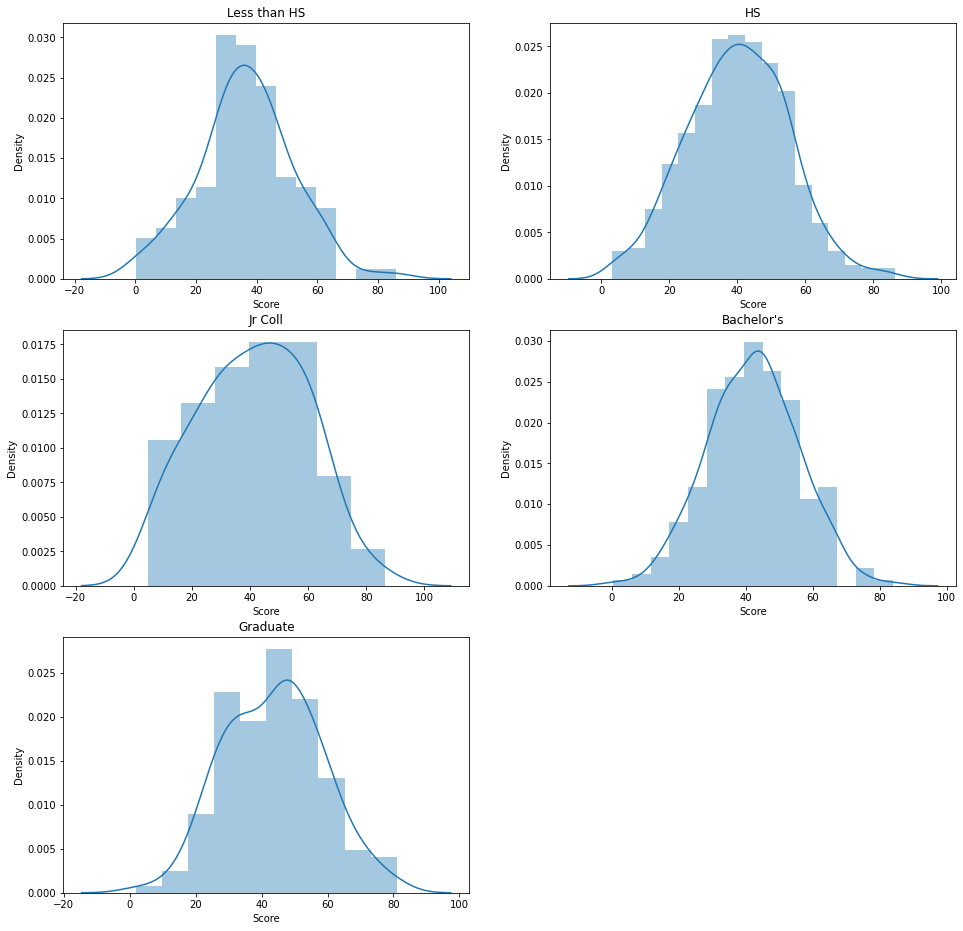

In [15]:
figure, axes = plt.subplots(3, 2, figsize=(16, 16))

# Less than HS
sns.distplot(temp_frames[0], ax = axes[0][0])
axes[0][0].set_xlabel("Score")
axes[0][0].set_title("Less than HS")

# HS
sns.distplot(temp_frames[1], ax = axes[0][1])
axes[0][1].set_xlabel("Score")
axes[0][1].set_title("HS")

# Jr Coll
sns.distplot(temp_frames[2], ax = axes[1][0])
axes[1][0].set_xlabel("Score")
axes[1][0].set_title("Jr Coll")

# Bachelor's
sns.distplot(temp_frames[3], ax = axes[1][1])
axes[1][1].set_xlabel("Score")
axes[1][1].set_title("Bachelor's")

# Graduate
sns.distplot(temp_frames[4], ax = axes[2][0])
axes[2][0].set_xlabel("Score")
axes[2][0].set_title("Graduate")

figure.delaxes(axes[2][1])
plt.show()


---
# ANOVA Analysis

<br> **Defining hypothesis for testing:** <br> <br>
*  Null Hypothesis  <br>

    > $ H_0 $ = Means of all 5 groups are same, i.e. there is no significant difference among the means [ $ \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 $ ]<br>
    

*  Alternative Hypothesis <br>

    > $ H_A $ = Mean of atleast 1 group is different
    
---

#### If F-Statistic is greater than F-Critical value, we reject the null hypothesis.

In [16]:
### Degrees of Freedom
dfs = temp_frames
df_b = len(dfs) - 1 # For b/w groups = k - 1 where k is number of groups
df_w = len(df) - len(dfs) # For within groups = N - k where N is total samples from all groups and k is number of groups

### F-Critical Value
F_CR = stats.f.ppf(0.95, df_b, df_w) # Using alpha = 0.05 (significance level)
print("F-Critical Value: ", round(F_CR, 2))

F-Critical Value:  2.38


In [17]:
### Creating temp dataframes for each group
df_lhs = temp_df['Less than HS'].dropna()
df_hs = temp_df['HS'].dropna()
df_jrc = temp_df['Jr Coll'].dropna()
df_bs = temp_df["Bachelor's"].dropna()
df_gr = temp_df["Graduate"].dropna()

#### Calculating means for MSG and MSE

In [19]:
### Mean for each group and overall
mean_lhs = df_lhs.mean()
mean_hs = df_hs.mean()
mean_jrc = df_jrc.mean()
mean_bs = df_bs.mean()
mean_gr = df_gr.mean()
mean_overall = df["Score"].mean()

print("Mean for group 'Less than HS' \t:", round(mean_lhs, 2))
print("Mean for group 'HS' \t\t:", round(mean_hs, 2))
print("Mean for group 'Jr Coll' \t:", round(mean_jrc, 2))
print("Mean for group 'Less than HS' \t:", round(mean_bs, 2))
print("Mean for group 'Less than HS' \t:", round(mean_gr, 2))
print("Overall mean \t\t\t:", round(mean_overall, 2))

Mean for group 'Less than HS' 	: 36.53
Mean for group 'HS' 		: 40.13
Mean for group 'Jr Coll' 	: 41.02
Mean for group 'Less than HS' 	: 42.13
Mean for group 'Less than HS' 	: 43.63
Overall mean 			: 40.73


#### Calculating MSG and MSE for F-Statistic

In [20]:
### Util function for calculating sum_squred for each group
def sum_squared_within(series, mean):
    sum = 0
    for item in series:
        sum += (item - mean) ** 2
    return sum

def sum_squared_between(dfs, means, mean_overall):
    sum = 0
    for idx, _df in enumerate(dfs):
        sum += len(_df) * ((means[idx] - mean_overall) ** 2)
    return sum

In [21]:
dfs = [df_lhs, df_hs, df_jrc, df_bs, df_gr]
means = [mean_lhs, mean_hs, mean_jrc, mean_bs, mean_gr]

ss_lhs = sum_squared_within(df_lhs, mean_lhs)
ss_hs = sum_squared_within(df_hs, mean_hs)
ss_jrc = sum_squared_within(df_jrc, mean_jrc)
ss_bs = sum_squared_within(df_bs, mean_bs)
ss_gr = sum_squared_within(df_gr, mean_gr)

SSE = ss_lhs + ss_hs + ss_jrc + ss_bs + ss_gr
SSB = sum_squared_between(dfs, means, mean_overall)
SST = SSE + SSB
print("Sum Squared Between (SSB): ", round(SSB, 2))
print("Sum Squared Error (SSE): ", round(SSE, 2))
print("Sum Squared Total (SST): ", round(SST, 2))

Sum Squared Between (SSB):  4128.06
Sum Squared Error (SSE):  262540.11
Sum Squared Total (SST):  266668.17


In [22]:
### MSG and MSE
MSG = SSB / df_b
MSE = SSE / df_w

#### Calculating F-Statistic ($ F = \frac{MSG}{MSE} $) and p-value

In [23]:
F = MSG / MSE
p_val = stats.f.sf(F, df_b, df_w)

#### ANOVA Analysis Table

In [24]:
print ("\t\t\t sum_sq \t df \t\t F \t PR(>F)")
print("Between Groups \t\t " + str(round(SSB, 2)) + "\t" + str(df_b) + "\t\t" + \
      str(round(F, 2)) + "\t" + str(round(p_val, 5)))
print("Within Groups \t\t " + str(round(SSE, 2)) + "\t" + str(df_w) + "\t\t")
print("Total \t\t\t " + str(round(SST, 2)) + "\t" + str(df_w + df_b) + "\t\t")

			 sum_sq 	 df 		 F 	 PR(>F)
Between Groups 		 4128.06	4		4.58	0.00112
Within Groups 		 262540.11	1166		
Total 			 266668.17	1170		


#### As the F-Statistic is greater than the F-Critical value (4.58 > 2.38), [also the p-value is less than alpha (0.00112 < 0.05)] we reject the null hypothesis. Hence, the mean of atleast one group is different. 

#### To check which pairs of groups have different means, we need to perform multiple pairwise comparisons.

#### Pairwise Comparisons

In [25]:
### Creating a util function to perform t-test
def t_test(dfA, dfB, K, alpha = 0.05):
    h0 = 0 # Null Value
    SE = math.sqrt(((dfA.std() ** 2) / len(dfA)) + ((dfB.std() ** 2) / len(dfB))) # Standard Error
    T = abs(dfA.mean() - dfB.mean() - h0) / SE # T-Value =  diff - h0 / SE
    df = min(len(dfA) - 1, len(dfB) - 1) # Degrees of Freedom = min(n1-1, n2-1)
    p_val = stats.t.sf(T, df)
    rejectH0 = p_val < (alpha / K) # Bonferroni Correction:alpha* = alpha / K where K = k(k-1) / 2 and k = number of groups
    return (SE, T, df, p_val, rejectH0)

In [26]:
### Pairs for comparisons
pairs = [
    "BS:GR",
    "BS:HS",
    "BS:JRC",
    "BS:LHS",
    "GR:HS",
    "GR:JRC",
    "GR:LHS",
    "HS:JRC",
    "HS:LHS",
    "JRC:LHS"
]

pairs_df = {
    "BS": df_bs,
    "GR": df_gr,
    "HS": df_hs,
    "JRC": df_jrc,
    "LHS": df_lhs,
}

print("Group1:Group2 \t\t Std. Err. \t\t T \t\t  p-val \t alpha* \t  Reject H0")
K = (len(dfs) * (len(dfs) - 1)) / 2 # k*(k-1)/2 where k=number of groups-Bonferroni Correction for comparing multiple means
                                
for pair in pairs:
    SE, T, _, p_val, rejectH0 = t_test(pairs_df[pair.split(":")[0]], pairs_df[pair.split(":")[1]], K)
    print(pair + "\t\t\t" + str(round(SE,4)) + "\t\t\t" + str(round(T, 4)) + "\t\t" + \
          str(round(p_val, 4)) + "\t\t" + str(0.05 / K) + "\t\t" + str(rejectH0))

Group1:Group2 		 Std. Err. 		 T 		  p-val 	 alpha* 	  Reject H0
BS:GR			1.47			1.016		0.1556		0.005		False
BS:HS			1.0572			1.8999		0.0293		0.005		False
BS:JRC			2.0904			0.5334		0.2975		0.005		False
BS:LHS			1.6513			3.3957		0.0005		0.005		True
GR:HS			1.3593			2.5764		0.0055		0.005		False
GR:JRC			2.2583			1.1551		0.1254		0.005		False
GR:LHS			1.8593			3.8192		0.0001		0.005		True
HS:JRC			2.0141			0.4436		0.3292		0.005		False
HS:LHS			1.5536			2.3166		0.0111		0.005		False
JRC:LHS			2.3803			1.8873		0.0311		0.005		False


#### Based on the pairwise comparisons, we can conclude that pairs of groups 1) "Bachelor's and Less than HS" and 2) "Graduate and Less than HS" have different means.

#### Confirming with homogenity tests

In [27]:
# Homogeneity using Bartlett & Levene Tests
w, pvalue = stats.bartlett(df['Score'][df['Education Level'] == 'Less than HS'],
                          df['Score'][df['Education Level'] == 'HS'],
                           df['Score'][df['Education Level'] == 'Jr Coll'],
                          df['Score'][df['Education Level'] == "Bachelor's"],
                          df['Score'][df['Education Level'] == 'Graduate'])

print("Bartlett's Test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w, pvalue))

w, pvalue = stats.levene(temp_df['Less than HS'].dropna(), \
        temp_df['HS'].dropna(), temp_df['Jr Coll'].dropna(), temp_df["Bachelor's"].dropna(), temp_df['Graduate'].dropna())
print("Levene's Test:\t\tw:{:7.4f}, pvalue:{:7.4f}".format(w, pvalue))

Bartlett's Test:	w:17.5776, pvalue: 0.0015
Levene's Test:		w: 5.4545, pvalue: 0.0002


#### As the Bartlett's test and Levene's Test both have p-value < alpha* (0.005), we can conclude that our ANOVA analysis is true.

---
# FINAL CONCLUSION
We reject the null hypothesis (means of all the groups are same), and there is indeed significant difference among the means of the groups. In layman terms, there is significant difference amonog the scores of individuals exposed to different levels of education. <br>

To be more specific, people who completed their bachelors had significantly different score than those who did not passed high school. Those who completed their graduation also had significantly different score from those who did not passed high school. Based on multiple pairwise comparisons, we could not find significance difference among the rest of the pairs of groups.